# Kaggle - Titanic

#### Reference: https://github.com/baidoosik/kaggle-solving

## 1. 문제 정의

### Goal
It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

### Metric
Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.

### Submission File Format
You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

* PassengerId (sorted in any order)
* Survived (contains your binary predictions: 1 for survived, 0 for deceased)

## 2. 데이터 수집

### Data sources

https://www.kaggle.com/c/titanic/data

The data has been split into two groups:

* training set (train.csv)
* test set (test.csv)

### Data description

* Survived: 0 = No, 1 = Yes
* Pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* SibSp: # of siblings / spouses aboard the Titanic
* Parch: # of parents / children aboard the Titanic
* Ticket: Ticket number
* Cabin: Cabin number
* Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

rc('font', family='Malgun Gothic')

%matplotlib inline

plt.style.use("ggplot")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 3. 데이터 분석

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
def bar_chart(feature, ax=None):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, ax=ax)

[Text(0.5, 1.0, '승선 장소')]

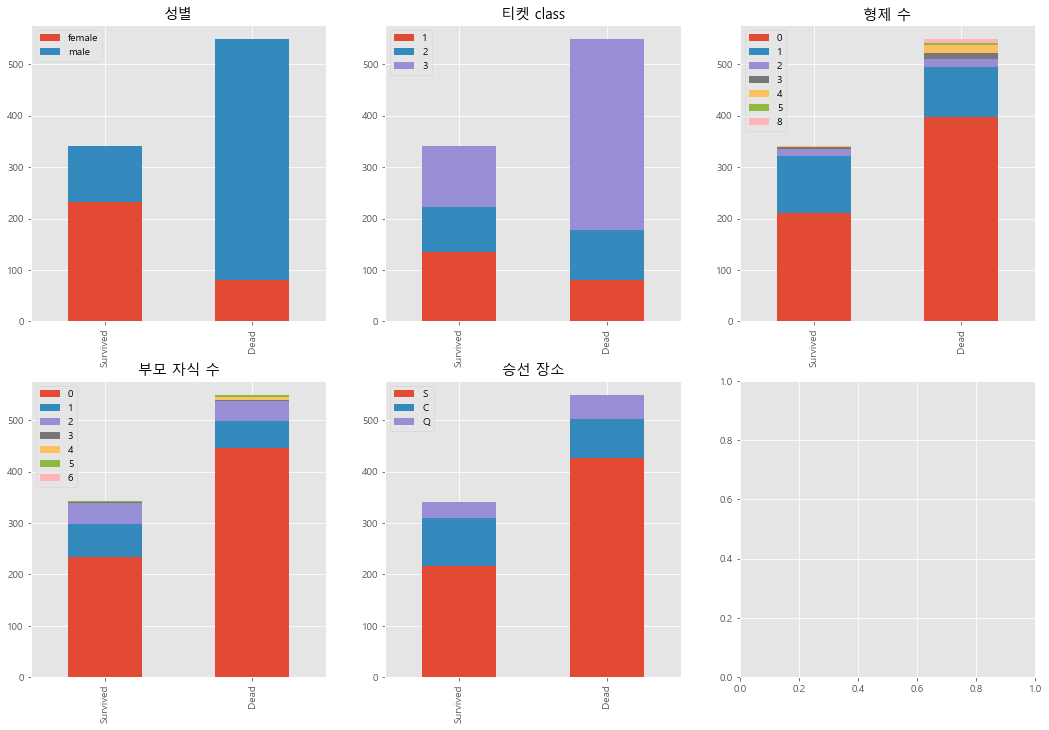

In [10]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,12)

bar_chart('Sex', ax1)
bar_chart('Pclass', ax2)
bar_chart('SibSp', ax3)
bar_chart('Parch', ax4)
bar_chart('Embarked', ax5)

ax1.set(title="성별")
ax2.set(title="티켓 class")
ax3.set(title="형제 수")
ax4.set(title="부모 자식 수")
ax5.set(title="승선 장소")

In [11]:
def count_plot(column, ax):
    sns.countplot(x=column, hue='Survived', data=train, ax=ax)

[Text(0.5, 1.0, '승선 장소')]

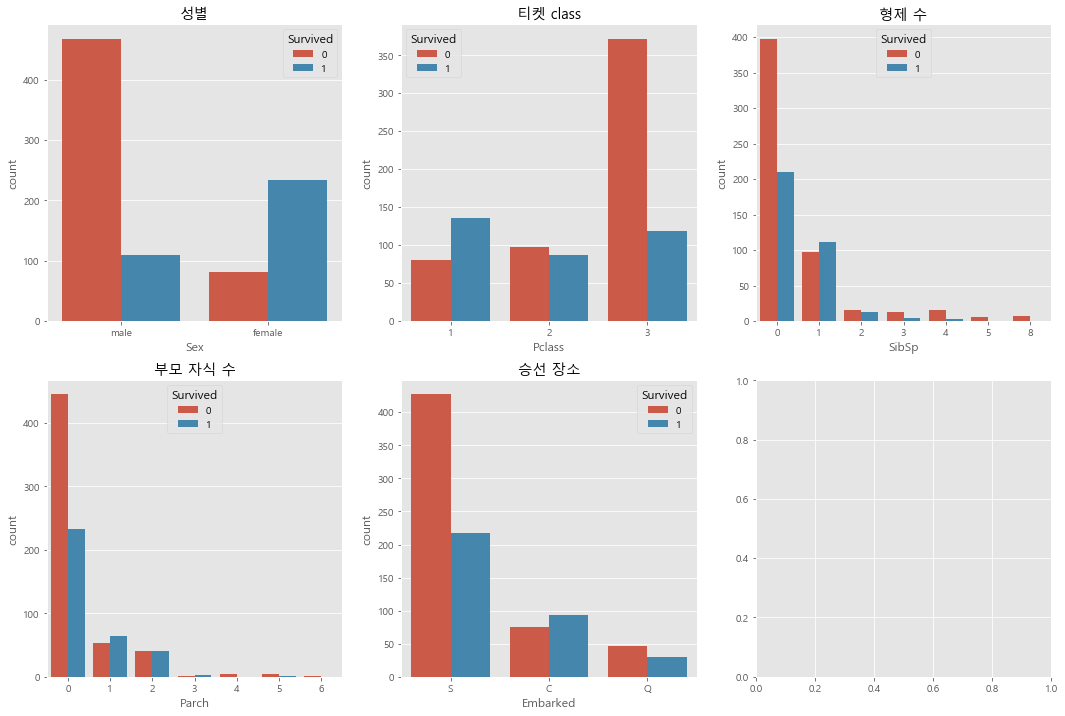

In [12]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,12)

count_plot('Sex', ax1)
count_plot('Pclass', ax2)
count_plot('SibSp', ax3)
count_plot('Parch', ax4)
count_plot('Embarked', ax5)

ax1.set(title="성별")
ax2.set(title="티켓 class")
ax3.set(title="형제 수")
ax4.set(title="부모 자식 수")
ax5.set(title="승선 장소")

In [13]:
features = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

In [14]:
def get_probability(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    total = survived + dead
    print("살아남은 확률: \n{} \n 죽은 확률: \n{}".format(survived/total, dead/total))

In [15]:
for feature in features:
    get_probability(feature)

살아남은 확률: 
female    0.742038
male      0.188908
Name: Sex, dtype: float64 
 죽은 확률: 
female    0.257962
male      0.811092
Name: Sex, dtype: float64
살아남은 확률: 
1    0.629630
2    0.472826
3    0.242363
Name: Pclass, dtype: float64 
 죽은 확률: 
1    0.370370
2    0.527174
3    0.757637
Name: Pclass, dtype: float64
살아남은 확률: 
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5         NaN
8         NaN
Name: SibSp, dtype: float64 
 죽은 확률: 
0    0.654605
1    0.464115
2    0.535714
3    0.750000
4    0.833333
5         NaN
8         NaN
Name: SibSp, dtype: float64
살아남은 확률: 
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4         NaN
5    0.200000
6         NaN
Name: Parch, dtype: float64 
 죽은 확률: 
0    0.656342
1    0.449153
2    0.500000
3    0.400000
4         NaN
5    0.800000
6         NaN
Name: Parch, dtype: float64
살아남은 확률: 
S    0.336957
C    0.553571
Q    0.389610
Name: Embarked, dtype: float64 
 죽은 확률: 
S    0.663043
C    0.446429
Q    0.610390
Name: Embar

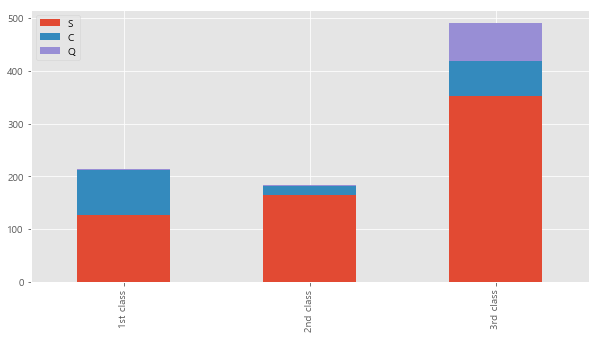

In [16]:
# pclass-embarked
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [17]:
# sns.FacetGrid?

In [18]:
# continuous data
def draw_facetgrid(feature):
    facet = sns.FacetGrid(train, hue='Survived', aspect=5)
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(0, train[feature].max()))
    facet.add_legend()
    plt.show()

C:\Users\User\Anaconda3\envs\aischool\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


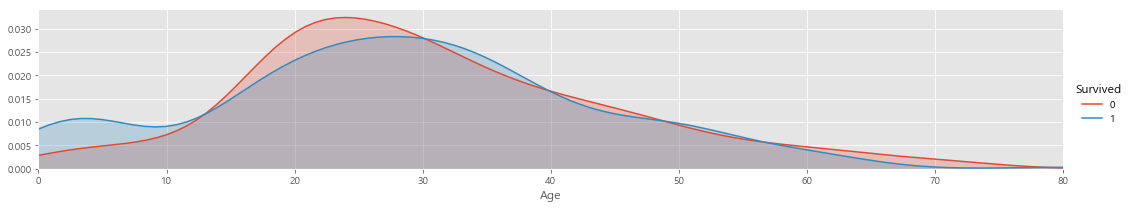

In [19]:
draw_facetgrid('Age')

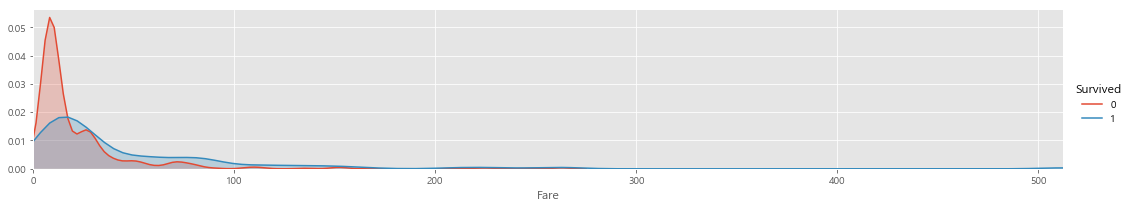

In [20]:
draw_facetgrid('Fare')

## 4. Feature Engineering

In [21]:
def drop_columns(feature):
    train.drop(feature, axis=1, inplace=True)
    test.drop(feature, axis=1, inplace=True)

In [22]:
train_test_data = [train, test]

### 4.1.1 Cabin

In [23]:
drop_columns('Cabin')

### 4.1.2 Ticket

In [24]:
drop_columns('Ticket')

### 4.1.3 Name

In [25]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [26]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Capt          1
Sir           1
Jonkheer      1
Ms            1
Mme           1
Don           1
Lady          1
Name: Title, dtype: int64

In [28]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

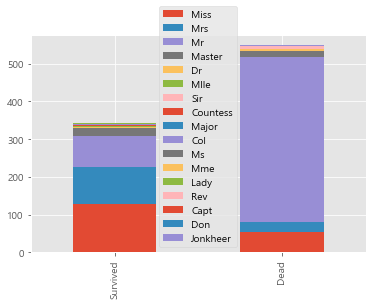

In [27]:
bar_chart('Title')

In [29]:
drop_columns('Name')

In [30]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 0, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 2, "Lady": 2, "Jonkheer": 1, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 0 }

In [31]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,0
1,2,1,1,female,38.0,1,0,71.2833,C,2
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,2
4,5,0,3,male,35.0,0,0,8.0500,S,0


In [32]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,0
1,893,3,female,47.0,1,0,7.0000,S,2
2,894,2,male,62.0,0,0,9.6875,Q,0
3,895,3,male,27.0,0,0,8.6625,S,0
4,896,3,female,22.0,1,1,12.2875,S,2


### 4.1.4 Sex

In [34]:
sex_mapping = {'male': 0, 'female': 1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [35]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,0
1,2,1,1,1,38.0,1,0,71.2833,C,2
2,3,1,3,1,26.0,0,0,7.9250,S,1
3,4,1,1,1,35.0,1,0,53.1000,S,2
4,5,0,3,0,35.0,0,0,8.0500,S,0


In [36]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,Q,0
1,893,3,1,47.0,1,0,7.0000,S,2
2,894,2,0,62.0,0,0,9.6875,Q,0
3,895,3,0,27.0,0,0,8.6625,S,0
4,896,3,1,22.0,1,1,12.2875,S,2


### 4.1.5 Age

In [37]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

In [38]:
train.isnull().sum(), test.isnull().sum()

(PassengerId    0
 Survived       0
 Pclass         0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Fare           0
 Embarked       2
 Title          0
 dtype: int64, PassengerId    0
 Pclass         0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Fare           1
 Embarked       0
 Title          0
 dtype: int64)

In [39]:
# binding
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.328713
2,"(32.252, 48.168]",0.436893
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [40]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3,
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4

In [42]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,1,0,3,0,1.0,1,0,7.2500,S,0,"(16.336, 32.252]"
1,2,1,1,1,2.0,1,0,71.2833,C,2,"(32.252, 48.168]"
2,3,1,3,1,1.0,0,0,7.9250,S,1,"(16.336, 32.252]"
3,4,1,1,1,2.0,1,0,53.1000,S,2,"(32.252, 48.168]"
4,5,0,3,0,2.0,0,0,8.0500,S,0,"(32.252, 48.168]"


In [41]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2.0,0,0,7.8292,Q,0
1,893,3,1,2.0,1,0,7.0000,S,2
2,894,2,0,3.0,0,0,9.6875,Q,0
3,895,3,0,1.0,0,0,8.6625,S,0
4,896,3,1,1.0,1,1,12.2875,S,2


In [43]:
train.drop('AgeBand', axis=1, inplace=True)

### 4.1.6 Embarked

In [44]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [45]:
mapping_data = {'S': 0, 'Q': 1, 'C': 2}

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(mapping_data)

In [46]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,1.0,1,0,7.2500,0,0
1,2,1,1,1,2.0,1,0,71.2833,2,2
2,3,1,3,1,1.0,0,0,7.9250,0,1
3,4,1,1,1,2.0,1,0,53.1000,0,2
4,5,0,3,0,2.0,0,0,8.0500,0,0


In [47]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,1.0,1,0,7.2500,0,0
1,2,1,1,1,2.0,1,0,71.2833,2,2
2,3,1,3,1,1.0,0,0,7.9250,0,1
3,4,1,1,1,2.0,1,0,53.1000,0,2
4,5,0,3,0,2.0,0,0,8.0500,0,0


### 4.1.7 Fare

In [48]:
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [49]:
train['FareBand'] = pd.cut(train['Fare'], 5)
train[['FareBand', 'Survived']].groupby('FareBand', as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 102.466]",0.361575
1,"(102.466, 204.932]",0.757576
2,"(204.932, 307.398]",0.647059
3,"(307.398, 409.863]",NaN
4,"(409.863, 512.329]",1.000000


In [50]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 102, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 102) & (dataset['Fare'] <= 204), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 204) & (dataset['Fare'] <= 307), 'Fare'] = 2,
    dataset.loc[dataset['Fare'] > 307, 'Fare'] = 3

In [51]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FareBand
0,1,0,3,0,1.0,1,0,0.0,0,0,"(-0.512, 102.466]"
1,2,1,1,1,2.0,1,0,0.0,2,2,"(-0.512, 102.466]"
2,3,1,3,1,1.0,0,0,0.0,0,1,"(-0.512, 102.466]"
3,4,1,1,1,2.0,1,0,0.0,0,2,"(-0.512, 102.466]"
4,5,0,3,0,2.0,0,0,0.0,0,0,"(-0.512, 102.466]"


In [52]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2.0,0,0,0.0,1,0
1,893,3,1,2.0,1,0,0.0,0,2
2,894,2,0,3.0,0,0,0.0,1,0
3,895,3,0,1.0,0,0,0.0,0,0
4,896,3,1,1.0,1,1,0.0,0,2


In [53]:
train.drop('FareBand', axis=1, inplace=True)

### 4.1.8 Parch + SibSp

In [54]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

C:\Users\User\Anaconda3\envs\aischool\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


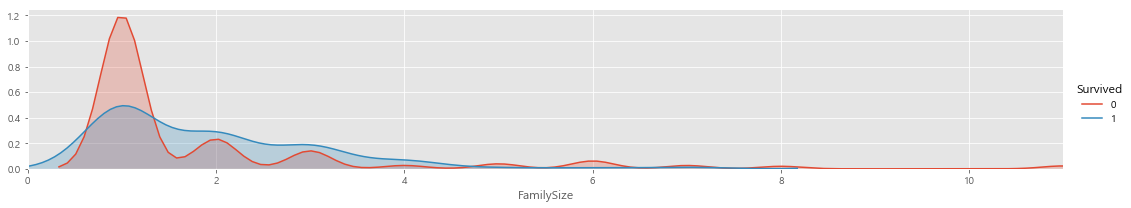

In [55]:
draw_facetgrid('FamilySize')

In [57]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [56]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,0.0,0,0,2
1,2,1,1,1,2.0,1,0,0.0,2,2,2
2,3,1,3,1,1.0,0,0,0.0,0,1,1
3,4,1,1,1,2.0,1,0,0.0,0,2,2
4,5,0,3,0,2.0,0,0,0.0,0,0,1


In [59]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,1,0,0.0
1,893,3,1,2.0,0.0,0,2,0.4
2,894,2,0,3.0,0.0,1,0,0.0
3,895,3,0,1.0,0.0,0,0,0.0
4,896,3,1,1.0,0.0,0,2,0.8


In [58]:
drop_columns(['SibSp', 'Parch'])

In [60]:
droped_data = ['Survived', 'PassengerId']
train_data = train.drop(droped_data, axis=1)

## 5. Modeling

In [62]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

target = train["Survived"]

### 5.1 Cross Validation (K-fold)

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### 5.2.1 KNN

In [64]:
clf = KNeighborsClassifier(n_neighbors=13)
scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

print(score)
print(round(np.mean(score)*100, 2))

[0.77777778 0.75280899 0.7752809  0.78651685 0.84269663 0.79775281
 0.79775281 0.79775281 0.78651685 0.82022472]
79.35


### 5.2.2 Desicion Tree

In [65]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

print(score)
print(round(np.mean(score)*100, 2))

[0.84444444 0.80898876 0.75280899 0.80898876 0.84269663 0.78651685
 0.78651685 0.79775281 0.78651685 0.7752809 ]
79.91


### 5.2.3 Naive Bayes

In [66]:
clf = GaussianNB()
scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

print(score)
print(round(np.mean(score)*100, 2))

[0.76666667 0.76404494 0.78651685 0.75280899 0.79775281 0.78651685
 0.78651685 0.79775281 0.82022472 0.80898876]
78.68


### 5.2.4 SVM

In [67]:
clf = SVC(gamma='auto')
scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

print(score)
print(round(np.mean(score)*100, 2))

[0.82222222 0.79775281 0.79775281 0.78651685 0.84269663 0.79775281
 0.78651685 0.84269663 0.82022472 0.83146067]
81.26


### 5.2.5 Randomforest

In [68]:
clf = RandomForestClassifier(n_estimators=200)
scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

print(score)
print(round(np.mean(score)*100, 2))

[0.83333333 0.79775281 0.78651685 0.78651685 0.84269663 0.7752809
 0.80898876 0.78651685 0.80898876 0.7752809 ]
80.02


## 6. Testing

In [70]:
test_data = test.drop("PassengerId", axis=1).copy()

In [71]:
clf = RandomForestClassifier(n_estimators=200)
clf.fit(train_data, target)

prediction = clf.predict(test_data)

In [72]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': prediction
})
submission.to_csv('submission.csv', index=False)